###Modelo de Neurona Perceptrón para clasificación de funciones AND y OR

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing as pp
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import random as rnd
%matplotlib inline

#### 1) Se definen las funciones de saparación lineal AND y OR

In [6]:
fn_and = pd.DataFrame(np.array([[0,0,0],[0,1,0],[1,0,0],[1,1,1]]),columns=["X1","X2","Y"])
fn_or = pd.DataFrame(np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]]),columns=["X1","X2","Y"])

####2)  Generamos sets de datos para dichas funciones

In [7]:
data = fn_or
for i in range(30):
   data = data.append(fn_or)
data = data.reset_index(drop=True)
print(data.head())
print(data.describe())

   X1  X2  Y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  1
4   0   0  0
               X1          X2           Y
count  124.000000  124.000000  124.000000
mean     0.500000    0.500000    0.750000
std      0.502028    0.502028    0.434769
min      0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.750000
50%      0.500000    0.500000    1.000000
75%      1.000000    1.000000    1.000000
max      1.000000    1.000000    1.000000


In [9]:
X_train = data[["X1","X2"]]  
Y_train = data[["Y"]]
print len(X_train)

 124


#### 3) Se definen las funciones entrena (con regularicación lambda) y el actualizador de las w's

In [10]:
def transferencia(w0,w,X):
    suma = w0
    for i in range(len(w)):
        suma = suma + w[i]*X.iloc[i]
    if suma > 0:
        indica = 1
    else:
        indica = 0
    return indica

In [11]:
def entrena(w0,w,X_train,Y_train,eta):
    for i in range(len(X_train)): 
        y_indica = transferencia(w0,w,X_train.iloc[i,0:len(X_train.columns)])
        error = Y_train.iloc[i,0] - y_indica
        w0 = w0 + eta*error
        for j in range(len(X_train.columns)):
            w[j] = w[j] + eta*error*X_train.iloc[i,j]
    return w0,w

####4) Valores iniciales y cálculo del umbral para las iteraciones

In [14]:
w0 = 0.5 
w = [0.2,0.2] 
eta = 0.05

In [15]:
print (w0,w,eta)

(0.5, [0.2, 0.2], 0.05)


In [16]:
new_w0, new_w = entrena(w0,w,X_train,Y_train,eta)
aux = np.linspace(-0.5,1.5,10)
umbral = -aux*new_w[0]/new_w[1]-new_w0/new_w[1]
print(new_w0, new_w, umbral)

(-0.04999999999999993, [0.2, 0.2], array([ 0.75      ,  0.52777778,  0.30555556,  0.08333333, -0.13888889,
       -0.36111111, -0.58333333, -0.80555556, -1.02777778, -1.25      ]))


####5) Iteramos en el recorrido de X para las estimaciones de Y

In [18]:
Y_hat = []
for i in range(len(X_train)):
    suma = new_w0 + new_w[0]*X_train.iloc[i,0]
    if suma > 0:
        indica = 1
    else:
        indica = 0
    Y_hat.append(indica)

####6) Visualización de clasificación de separadores lineales

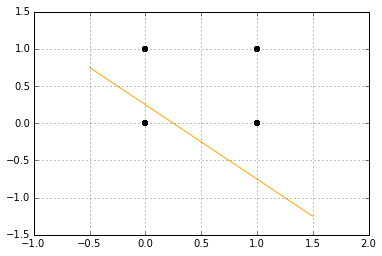

In [26]:
plt.scatter(X_train[["X1"]],Y_hat,color="black")
plt.scatter(X_train[["X2"]],Y_hat,color="black")
plt.plot(aux,umbral, color="orange")
plt.grid()